### WebScraping para obtener la poblacion de CABA

Buascare extraer de internet informacion sobre la poblacion de CABA, lo cual me permitira realizar los KPI`s posteriormente

- Importo las librerias necesarias

In [2]:
import requests
import numpy as np
import herramientas
from IPython.display import Image, display
from bs4 import BeautifulSoup
import pandas as pd

Extraemos la informacion de una página web (URL), la cual quiero hacer web scraping. En este caso utilizare la siguiente pagina:https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/Poblacion2

In [3]:
# URL de la página web de la cual quieres hacer web scraping
url = 'https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/Poblacion2'

Se envía una solicitud HTTP para obtener el contenido de la página y se crea un objeto BeautifulSoup para analizar el contenido HTML de la página.

In [4]:
# Realizar la petición HTTP a la página web
respuesta = requests.get(url)
# Parsear el contenido HTML de la página utilizando BeautifulSoup
soup = BeautifulSoup(respuesta.text, 'html.parser')


Se procede a investigar la pagina con el inspector de elementos del navegador que  estemos utlizando, en mi caso es Google Chrome para conocer la estructura de etiquetas hasta el dato, con el fin de armar el código para extraer la información.

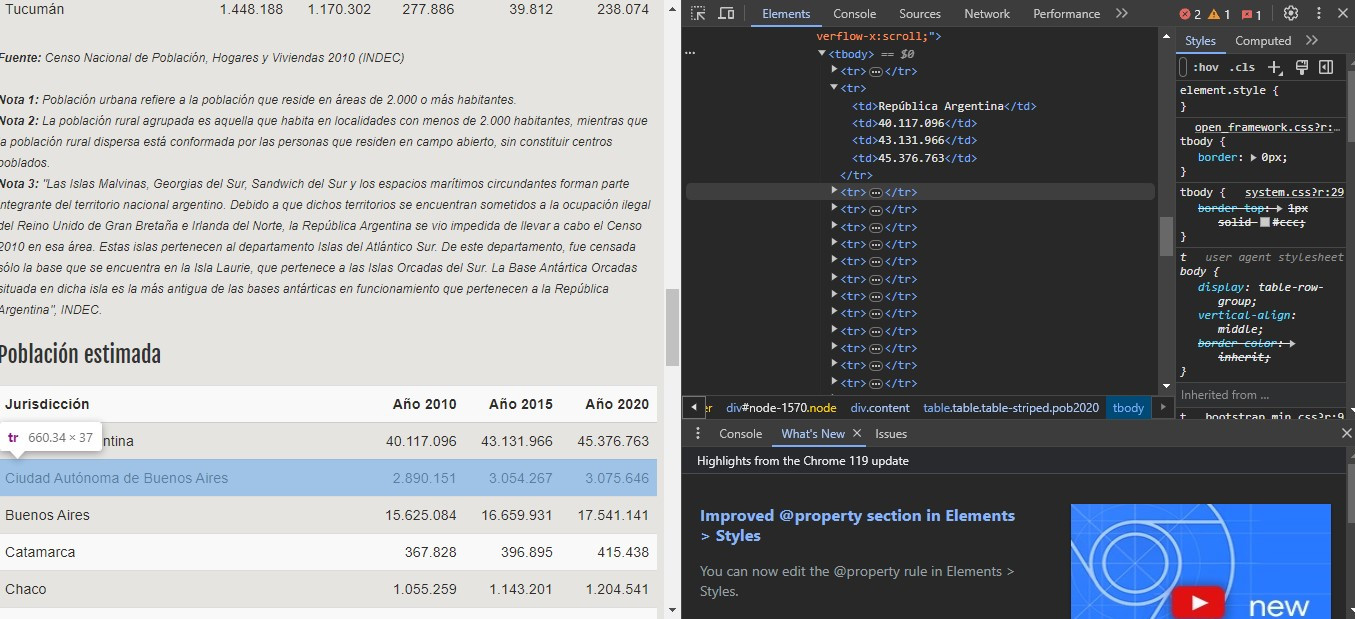

In [5]:
display(Image(filename='png/Webscraping.jpg'))

Se puede ver que la tabla de interés se encuentra dentro de una etiqueta '**table**', pero hay mas de una de estas etiquetas en toda la página, por lo tanto se debe iterar por todas las etiquetas '**table**'.
Por medio del siguiente codigo comentado correctamente , pudimos extraer dicha tabla y guardarla en un dataframe para luego realizarle un breve proceso de ETL para quedarnos con la informacion que sea de nuestro interes

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL de la página web que contiene la tabla
url = 'https://www.ign.gob.ar/NuestrasActividades/Geografia/DatosArgentina/Poblacion2'

# Realizar la solicitud GET a la página web
response = requests.get(url)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Obtener el contenido HTML de la página
    html_content = response.content

    # Crear un objeto BeautifulSoup para analizar el contenido HTML
    soup = BeautifulSoup(html_content, 'html.parser')

    # Encontrar la tabla específica por su clase
    tabla = soup.find('table', class_='table table-striped pob2020')

    # Verificar si se encontró la tabla
    if tabla:
        # Crear listas para almacenar los datos de cada columna
        jurisdiccion = []
        anio_2010 = []
        anio_2015 = []
        anio_2020 = []
        
        # Obtener las filas de la tabla
        filas = tabla.find_all('tr')
        for fila in filas[1:]:  # Empezamos desde la segunda fila para evitar los encabezados
            # Obtener las celdas de cada fila
            columnas = fila.find_all('td')
            # Extraer el texto de cada celda y agregarlo a la lista correspondiente
            jurisdiccion.append(columnas[0].get_text(strip=True))
            anio_2010.append(columnas[1].get_text(strip=True))
            anio_2015.append(columnas[2].get_text(strip=True))
            anio_2020.append(columnas[3].get_text(strip=True))

        # Crear un DataFrame con los datos obtenidos
        data = {
            'Jurisdiccion': jurisdiccion,
            'Año 2010': anio_2010,
            'Año 2015': anio_2015,
            'Año 2020': anio_2020
        }
        df_poblacion = pd.DataFrame(data)
        print(df_poblacion)  # Imprimir el DataFrame
        # También puedes guardar el DataFrame en un archivo CSV
        # df_poblacion.to_csv('datos_extraidos.csv', index=False)
    else:
        print('No se encontró la tabla con la clase especificada.')
else:
    print('La solicitud no fue exitosa. Código de estado:', response.status_code)


                                         Jurisdiccion    Año 2010    Año 2015  \
0                                 República Argentina  40.117.096  43.131.966   
1                     Ciudad Autónoma de Buenos Aires   2.890.151   3.054.267   
2                                        Buenos Aires  15.625.084  16.659.931   
3                                           Catamarca     367.828     396.895   
4                                               Chaco   1.055.259   1.143.201   
5                                              Chubut     509.108     566.922   
6                                             Córdoba   3.308.876   3.567.654   
7                                          Corrientes     992.595   1.070.283   
8                                          Entre Ríos   1.235.994   1.321.415   
9                                             Formosa     530.162     579.250   
10                                              Jujuy     673.307     727.780   
11                          

Visualizo los datos de mi dataframe

In [7]:
df_poblacion

,Jurisdiccion,Año 2010,Año 2015,Año 2020
0,República Argentina,40.117.096,43.131.966,45.376.763
1,Ciudad Autónoma de Buenos Aires,2.890.151,3.054.267,3.075.646
2,Buenos Aires,15.625.084,16.659.931,17.541.141
3,Catamarca,367.828,396.895,415.438
4,Chaco,1.055.259,1.143.201,1.204.541
5,Chubut,509.108,566.922,618.994
6,Córdoba,3.308.876,3.567.654,3.760.450
7,Corrientes,992.595,1.070.283,1.120.801
8,Entre Ríos,1.235.994,1.321.415,1.385.961
9,Formosa,530.162,579.250,605.193


Verifico el tipo de dato del dataframe

In [8]:
herramientas.verifica_tipo_y_nulos(df_poblacion)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,Jurisdiccion,[<class 'str'>],100.0,0.0,0
1,Año 2010,[<class 'str'>],100.0,0.0,0
2,Año 2015,[<class 'str'>],100.0,0.0,0
3,Año 2020,[<class 'str'>],100.0,0.0,0


Cambio a valores numericos a los valores en las columnas de los años

In [9]:
herramientas.convertir_columnas_a_numero(df_poblacion)

,Jurisdiccion,Año 2010,Año 2015,Año 2020
0,República Argentina,40117096,43131966,45376763
1,Ciudad Autónoma de Buenos Aires,2890151,3054267,3075646
2,Buenos Aires,15625084,16659931,17541141
3,Catamarca,367828,396895,415438
4,Chaco,1055259,1143201,1204541
5,Chubut,509108,566922,618994
6,Córdoba,3308876,3567654,3760450
7,Corrientes,992595,1070283,1120801
8,Entre Ríos,1235994,1321415,1385961
9,Formosa,530162,579250,605193


In [10]:
herramientas.verifica_tipo_y_nulos(df_poblacion)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,Jurisdiccion,[<class 'str'>],100.0,0.0,0
1,Año 2010,[<class 'int'>],100.0,0.0,0
2,Año 2015,[<class 'int'>],100.0,0.0,0
3,Año 2020,[<class 'int'>],100.0,0.0,0


Realice una interpolacion lineal entre el año 2015 y 2020 de mi dataframe para estimar los valores intermedios de los mismos, es decir del año 2016 hasta el año 2021. Sin modificar la columna Jurisdiccion

In [11]:
herramientas.interpolacion_lineal(df_poblacion)

,Jurisdiccion,2016,2017,2018,2019,2020,2021
0,República Argentina,43580925.4,44029884.8,44478844.2,44927803.6,45376763.0,45825722.4
1,Ciudad Autónoma de Buenos Aires,3058542.8,3062818.6,3067094.4,3071370.2,3075646.0,3079921.8
2,Buenos Aires,16836173.0,17012415.0,17188657.0,17364899.0,17541141.0,17717383.0
3,Catamarca,400603.6,404312.2,408020.8,411729.4,415438.0,419146.6
4,Chaco,1155469.0,1167737.0,1180005.0,1192273.0,1204541.0,1216809.0
5,Chubut,577336.4,587750.8,598165.2,608579.6,618994.0,629408.4
6,Córdoba,3606213.2,3644772.4,3683331.6,3721890.8,3760450.0,3799009.2
7,Corrientes,1080386.6,1090490.2,1100593.8,1110697.4,1120801.0,1130904.6
8,Entre Ríos,1334324.2,1347233.4,1360142.6,1373051.8,1385961.0,1398870.2
9,Formosa,584438.6,589627.2,594815.8,600004.4,605193.0,610381.6


In [12]:
herramientas.verifica_tipo_y_nulos(df_poblacion)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,Jurisdiccion,[<class 'str'>],100.0,0.0,0
1,Año 2010,[<class 'int'>],100.0,0.0,0
2,Año 2015,[<class 'int'>],100.0,0.0,0
3,Año 2020,[<class 'int'>],100.0,0.0,0
4,2016,[<class 'float'>],100.0,0.0,0
5,2017,[<class 'float'>],100.0,0.0,0
6,2018,[<class 'float'>],100.0,0.0,0
7,2019,[<class 'float'>],100.0,0.0,0
8,2020,[<class 'float'>],100.0,0.0,0
9,2021,[<class 'float'>],100.0,0.0,0


In [13]:
df_poblacion.columns

Index(['Jurisdiccion',     'Año 2010',     'Año 2015',     'Año 2020',
                 2016,           2017,           2018,           2019,
                 2020,           2021],
      dtype='object')

Procedo a eliminar las columnas:'Año 2010', 'Año 2015', 'Año 2020'

In [14]:
df_poblacion=df_poblacion.drop('Año 2010', axis=1)
df_poblacion=df_poblacion.drop('Año 2015', axis=1)
df_poblacion=df_poblacion.drop('Año 2020', axis=1)

In [15]:
df_poblacion

,Jurisdiccion,2016,2017,2018,2019,2020,2021
0,República Argentina,43580925.4,44029884.8,44478844.2,44927803.6,45376763.0,45825722.4
1,Ciudad Autónoma de Buenos Aires,3058542.8,3062818.6,3067094.4,3071370.2,3075646.0,3079921.8
2,Buenos Aires,16836173.0,17012415.0,17188657.0,17364899.0,17541141.0,17717383.0
3,Catamarca,400603.6,404312.2,408020.8,411729.4,415438.0,419146.6
4,Chaco,1155469.0,1167737.0,1180005.0,1192273.0,1204541.0,1216809.0
5,Chubut,577336.4,587750.8,598165.2,608579.6,618994.0,629408.4
6,Córdoba,3606213.2,3644772.4,3683331.6,3721890.8,3760450.0,3799009.2
7,Corrientes,1080386.6,1090490.2,1100593.8,1110697.4,1120801.0,1130904.6
8,Entre Ríos,1334324.2,1347233.4,1360142.6,1373051.8,1385961.0,1398870.2
9,Formosa,584438.6,589627.2,594815.8,600004.4,605193.0,610381.6


Verifico si se eliminaron correctamente las columnas

In [16]:
herramientas.verifica_tipo_y_nulos(df_poblacion)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,Jurisdiccion,[<class 'str'>],100.0,0.0,0
1,2016,[<class 'float'>],100.0,0.0,0
2,2017,[<class 'float'>],100.0,0.0,0
3,2018,[<class 'float'>],100.0,0.0,0
4,2019,[<class 'float'>],100.0,0.0,0
5,2020,[<class 'float'>],100.0,0.0,0
6,2021,[<class 'float'>],100.0,0.0,0


Procedo a modificar el tipo de las columnas de los años a entero

In [17]:
df_poblacion[2016]=df_poblacion[2016].astype(int)
df_poblacion[2017]=df_poblacion[2017].astype(int)
df_poblacion[2018]=df_poblacion[2018].astype(int)
df_poblacion[2019]=df_poblacion[2019].astype(int)
df_poblacion[2020]=df_poblacion[2020].astype(int)
df_poblacion[2021]=df_poblacion[2021].astype(int)

Verifico si se realizaron los cambios

In [18]:
herramientas.verifica_tipo_y_nulos(df_poblacion)

,nombre_campo,tipo_datos,no_nulos_%,nulos_%,nulos
0,Jurisdiccion,[<class 'str'>],100.0,0.0,0
1,2016,[<class 'int'>],100.0,0.0,0
2,2017,[<class 'int'>],100.0,0.0,0
3,2018,[<class 'int'>],100.0,0.0,0
4,2019,[<class 'int'>],100.0,0.0,0
5,2020,[<class 'int'>],100.0,0.0,0
6,2021,[<class 'int'>],100.0,0.0,0


Procedo a eliminar todas las filas distintas a **Ciudad Autónoma de Buenos Aires**, la cual es de mi interes

In [19]:
df_poblacion_caba=df_poblacion[df_poblacion['Jurisdiccion']== 'Ciudad Autónoma de Buenos Aires'].copy()

In [20]:
df_poblacion_caba

,Jurisdiccion,2016,2017,2018,2019,2020,2021
1,Ciudad Autónoma de Buenos Aires,3058542,3062818,3067094,3071370,3075646,3079921


### Carga del dataset 'poblacion_caba.csv'

Se procede a guardar los cambios anteriormente realizados en un archivo llamado  **'poblacion_caba.csv'**

In [21]:
df_poblacion_caba_limpio = 'data/poblacion_caba.csv'
df_poblacion_caba.to_csv(df_poblacion_caba_limpio, index=False, encoding='utf-8')
print(f'Se guardó el archivo {df_poblacion_caba_limpio}')

Se guardó el archivo data/poblacion_caba.csv
